In [5]:

import fitz
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from paddleocr import PaddleOCR, draw_ocr

加载OCR提取模型

In [6]:
ocr = PaddleOCR(use_angle_cls=True, lang="ch", page_num=2)  # need to run only once to download and load model into memory
def ppocr_recognize(img_path):
    # Paddleocr目前支持的多语言语种可以通过修改lang参数进行切换
    # 例如`ch`, `en`, `fr`, `german`, `korean`, `japan`
    result = ocr.ocr(img_path, cls=True)
    for idx in range(len(result)):
        res = result[idx]
        for line in res:
            print(line)
    return result

[2023/11/08 07:50:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=2, det_algorithm='DB', det_model_dir='/home/codespace/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/codespace/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

读取PDF

In [7]:

img_path = './dota2.pdf'

def extract_formula_from_pdf(pdf_path):
    pdf_document = fitz.open(pdf_path)
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        

        # 显示图像
        display(img)

        # 提取文字及位置
        result = ppocr_recognize(page)
        # 翻译文字

        # 粘贴翻译结果到图片中
        res = result
        image = img
        boxes = [line[0] for line in res]
        txts = [line[1][0] for line in res]
        scores = [line[1][1] for line in res]
        im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/fonts/simfang.ttf')
        im_show = Image.fromarray(im_show)
        im_show.save('result_page_{}.jpg'.format(page_num))

        break



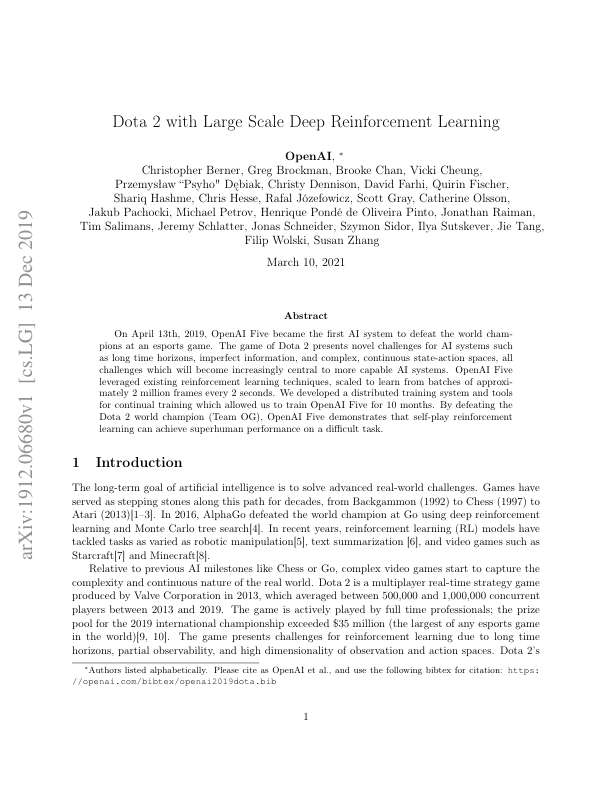

AssertionError: 

In [8]:
extract_formula_from_pdf(img_path)